In [1]:
import matplotlib.pyplot as plt
import os
import subprocess
import re 

In [3]:

result_folder = "/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments/"

In [23]:
# cpu_half_life = 6h
version = "default"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2

throughput = [1535.17, 2084.68, 2020.77, 2218.64,]
rps = [1935,2086,2022,2221]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-default-20220412064322.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-default-20220412064322.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [24]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.2066304909560723
0.0006327900287632616
0.0006083086053412553
0.0010625844214318448


0.052233543502902165

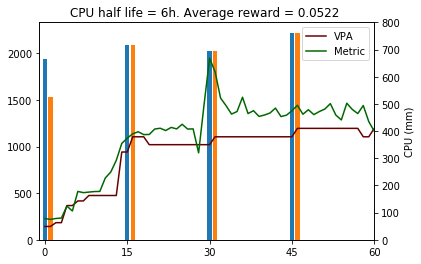

In [32]:
plt.bar(range(0,60,15), rps, label="RPS")
plt.bar(range(1,61,15), throughput, label="Throughput")

plt.xticks(range(0,61,15))
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,800)


plt.title("CPU half life = 6h. Average reward = 0.0522 ")
plt.legend()
plt.show()

In [33]:
# cpu_half_life = 15m
version = "15m"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [1587.15, 2224.67, 2246.68, 1998.77] 
rps = [2086,2226,2248,2001]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-15m-20220413035112.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-15m-20220413035112.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [34]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.23914189837008626
0.0005974842767295271
0.0005871886120997169
0.0011144427786107037


0.06036025350938155

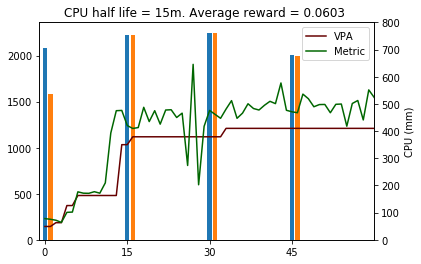

In [35]:
plt.bar(range(0,60,15), rps)
plt.bar(range(1,61,15), throughput)

plt.xticks(range(0,60,15))
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,800)

plt.legend()
plt.title("CPU half life = 15m. Average reward = 0.0603 ")
plt.show()

In [30]:
# cpu_half_life = 6h
version = "default-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [ 1459.21, 9855.85, 2041.76, 16844.27, 2116.72, 16991.43, 2079.90] 
rps = [1890,20002,2042,20024,2118,19986,2080]
duration = [13,2,13,2,15,2,13]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-default-bursty-20220413015941.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-default-bursty-20220413015941.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [31]:
r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

0.2279312169312169
0.5072567743225678
0.00011753183153771258
0.15879594486616058
0.0006043437204911237
0.14983338336835783
4.807692307687935e-05


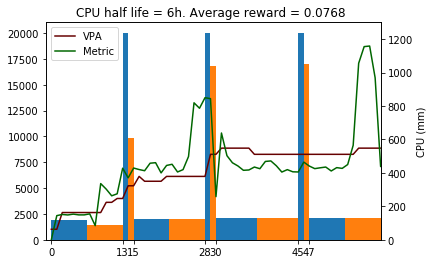

In [32]:
x_range = [0,13,15,28,30,45,47]

x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 6h. Average reward = %.4f "%avg_r)
plt.show()

In [13]:
# cpu_half_life = 6h
version = "15m-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [ 1507.04, 6977.62, 1881.68, 16429.76, 1664.99, 16922.47, 1956.63] 
rps = [2127,19992,1885,20032,1666,20005,1959]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-15m-bursty-20220413045952.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-15m-bursty-20220413045952.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [14]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.29147155618241655
0.6509793917567027
0.001761273209549038
0.17982428115015983
0.000606242496998794
0.15408797800549856
0.0012098009188360852


0.3199851309300404

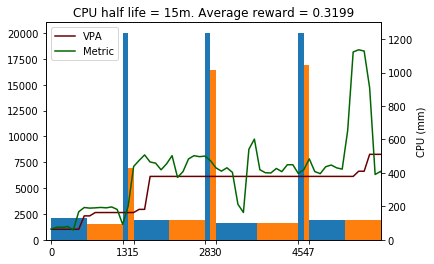

In [16]:
x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")


plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 15m. Average reward = 0.3199")
plt.show()

0.229407598197038
0.6502060412082417
0.005290446471435421
0.20401079676097172
0.0006208791208791809
0.17618579344082258
0.0005310573731625845


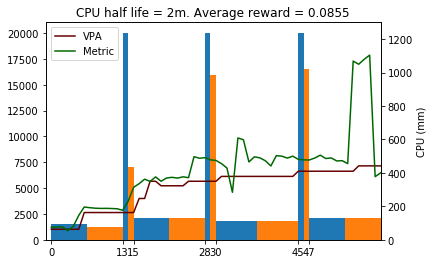

In [27]:
# cpu_half_life = 6h
version = "2m-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [  1196.73, 6994.48, 2071.98, 15924.56, 1818.87, 16503.47, 2107.88] 
rps = [1553,19996,2083,20006,1820,20033,2109]
duration = [13,2,13,2,15,2,13]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-2m-bursty-20220413171051.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-2m-bursty-20220413171051.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 2m. Average reward = %.4f"%avg_r)
plt.show()

0.3579878357830714
0.6463709959522262
0.0044751381215470025
0.10273059406436114
4.9652432969170335e-05
0.11899559823929567
0.00011398963730571362


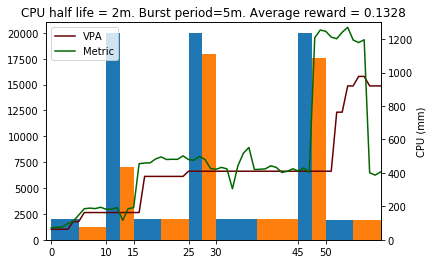

In [29]:
# cpu_half_life = 6h
version = "2m-bursty-5mbursts"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [   1266.69, 7076.47, 1982.09, 17928.34, 2013.90, 17613.04, 1929.78] 
rps = [1973,20011,1991,19981,2014,19992,1930]
duration = [10,5,10,5,15,5,10]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-2m-bursty-5mbursts-20220415173722.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-2m-bursty-5mbursts-20220415173722.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

x_range = [0,10,15,25,30,45,50]
x_range2 = [5,12.5,20,27.5,37.5,47.5,55]
w = [5,2.5,5,2.5,7.5,2.5,5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 2m. Burst period=5m. Average reward = %.4f"%avg_r)
plt.show()

In [121]:
replicas = 2
def plot(version, experiment_type, half_life, experiment_duration=60, extended_duration=120):
    version_folder = os.path.join(result_folder, experiment_type + "-" + version)
    with open(version_folder + "/workload_details.txt") as f:
        rps = list(map(int,f.readline().rstrip().split(',')))
        per_rps_duration = list(map(int, f.readline().rstrip().split(',')))
    
    p_object = subprocess.run("grep Requests %s/* | awk '{print $2}'"%version_folder, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    actual_rps = list([int(i.split('.')[0]) for i in p_object.stdout.decode("ascii").split()])
    print(actual_rps)

    vpa_values  = []
    with open(version_folder + "/cpu-nginx-vpa-%s.log"%version) as f:
        for line in f:
            vpa_values.append(int(line[:-2]))
    vpa_values_exp_window = vpa_values[:experiment_duration*2 + extended_duration*2] # collected every 30s.

    cpu_values = []
    with open(version_folder + "/metrics-nginx-deployment-%s.log"%version) as f:
        count = 0
        for cont1, cont2 in zip(f,f):
            if version == "hl15-margin1-start250":
             if count < 24:
                cpu_values.append((int(cont1[:-2])+int(cont2[:-2]))/2)
             else:
                cpu_values.append(int(cont1[:-2]))
                cpu_values.append(int(cont2[:-2]))
            else:
               cpu_values.append((int(cont1[:-2])+int(cont2[:-2]))/2) 
            count += 1
    cpu_values_exp_window = cpu_values[:experiment_duration*2 + extended_duration*2]


    r = 0
    for i,j,k in zip(rps, actual_rps, per_rps_duration):
        r+= (k * (i-j))/i
    avg_r = r/sum(per_rps_duration)
    print("average reward ",avg_r)

    x_range1 = [0] # start of the first bar graph/
    x_range2 = []
    w = []
    per_rps_duration_m = list([i//60 for i in per_rps_duration])
    for i, value in enumerate(per_rps_duration_m[:-1]):
        x_range1.append(x_range1[i] + value)
        w.append(value/2)
    w.append((experiment_duration - x_range1[-1])/2 )
    for i, value in enumerate(w):
        x_range2.append(x_range1[i]+w[i])
    
    print(x_range1)
    print(x_range2)
    
    plt.bar(x_range1, rps,width=w, align="edge")
    plt.bar(x_range2, actual_rps, width=w, align="edge")
    #plt.xticks(x_range1)
    plt.xticks(list(range(0,experiment_duration+extended_duration,60)))
    plt.xlim(-1,experiment_duration+extended_duration)
    
    axes2 = plt.twinx()
    axes2.plot( vpa_values_exp_window[0::2], color=(0.4,0.0,0.0), label='VPA')
    axes2.plot( cpu_values_exp_window[0::2], color= (0.0,0.4,0.0), label="Metric")
    axes2.set_ylabel('CPU (mm)')
    axes2.set_ylim(0,5500)
    plt.legend()
    plt.title("CPU half life = %dm. Average reward = %.4f"%(half_life, avg_r))
    plt.show()


[4277, 9942, 9888, 10120]
average reward  0.14824124823179322
[0, 15, 30, 45]
[7.5, 22.5, 37.5, 52.5]


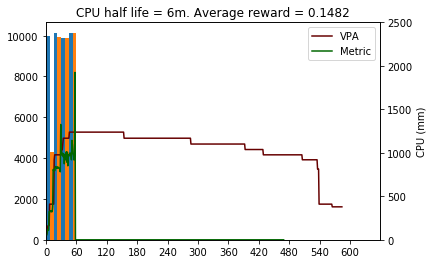

In [95]:
plot("6h-high-mean2", "nginx", 6, extended_duration=600)

[4604, 9980, 9888, 10126]
average reward  0.13896942653761452
[0, 15, 30, 45]
[7.5, 22.5, 37.5, 52.5]


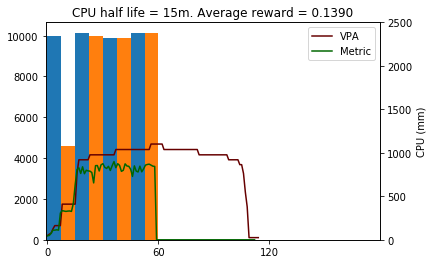

In [101]:
# sync from the other machine
plot("hl15m-random", "nginx", 15, extended_duration=120)

[6662, 10137, 9887]
average reward  0.08357381602219977
[0, 15, 30, 45]
[7.5, 22.5, 37.5, 52.5]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

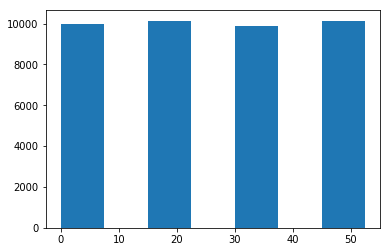

In [89]:
plot("hl15-margin1", "nginx", 15)

[7815, 10137, 9882, 10119]
average reward  0.0550293446174523
[0, 15, 30, 45]
[7.5, 22.5, 37.5, 52.5]


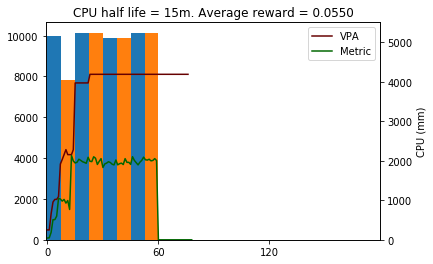

In [122]:
plot("hl15-margin1-start250", "nginx", 15)

In [4]:
version = "test-full"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 0.1 * float(config.split(',')[0]))
        print(config)
    print()

0.5981131111111112
5.99080873732626,0.15,25.0

0.48487222222222215
6,0.34111580637981587,31

0.5180205555555555
6,0.3467875471732618,33

0.42411177777777764
6,0.6532404802329443,78

0.4161651111111111
6,0.6183167735180539,71

0.3421575555555555
6,0.785148568886758,111

0.29460711111111115
6,1.0342989000931366,145

0.289042111111111
6,1.0322593624952847,145

0.2892735555555557
6,1.1246879852215392,151

0.2672967777777777
6,1.2095424351035566,154

0.12123577777777772
6,1.2180519753349137,154

0.12334333333333325
6,1.4249317612048733,161

0.2694518888888888
6,1.4374950895514838,161

0.25858211111111107
6,1.4402614766953987,177

1.0
6,1.7208226952013852,194

0.32123
6,0.45606907112381934,137

0.2787142222222222
6,0.8008527900588894,158

0.25085511111111103
6,0.8247405338045647,184

0.29937488888888897
6,0.847261284459387,184



FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments//nginx-test-full/20/cost'

In [16]:
version = "3-params-random"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 0.1 * float(config.split(',')[0]))
        print(config)
    print()

0.4750966666666665
6,0.15,25.0

0.43430366666666664
5.778910259732421,0.23454741321692202,35.0

0.35046200000000005
6,0.6116002470581581,52.0

0.38249733333333336
6,0.5392886244362503,77.0

0.3917772222222222
6,0.7209711009411297,89.0

0.3242568888888888
6,0.7149946341569812,93.0

0.32446288888888886
6,0.7501633462826682,93.0

0.3197604444444444
6,0.7799278486855874,102.0



FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments//nginx-3-params-random/9/cost'

In [8]:
version = "3-params-high-half-life-cost"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 1 * float(config.split(',')[0]))
        print(config)
    print()

0.35984533333333335
5.952911924738479,0.7513641720029086,108.0

0.11720144444444447
5.956996071323728,0.694231223550686,117.0

0.4809625555555552
5.415640212833993,0.15,50.0

0.4836331111111112
3.021475189663877,0.15,25.0

0.2924275555555558
2.6476116509634826,0.15,25.0

0.3336893333333335
2.5472428805026652,0.15,144.0



FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments//nginx-3-params-high-half-life-cost/7/cost'

In [21]:
version = "3-params-random"
for i in os.listdir("%s/nginx-%s/"%(result_folder, version)):
    with open(result_folder+"nginx-"+version+"/"+i+"/config.txt") as f:
        print(f.read())


6,0.7149946341569812,93.0
6,0.5392886244362503,77.0
6,0.6116002470581581,52.0
5.4242253455082645,0.2525752640535669,106.0
6,1.6193305956586124,69.0
5.369909499907932,0.15,36.0
6,0.5888432451861746,171.0
6,0.8429943645022757,25.0
6,0.15,25.0
5.265660553411818,0.5340109114576107,31.0
6,0.7501633462826682,93.0
6,0.15,25.0
5.066501738747778,0.15,25.0
6,0.7209711009411297,89.0
5.254692692673196,0.8698166996002391,96.0
5.778910259732421,0.23454741321692202,35.0
5.237208801048006,0.421668782574139,69.0
6,0.8769942344246207,63.0
5.659678922536185,0.8530989566960848,25.0
6,1.1706949492674825,118.0
6,0.7799278486855874,102.0
5.686350785281877,0.15,134.0
6,0.5601725687137232,89.0
6,0.9663157811077258,156.0
6,0.15,25.0
5.654887014055873,0.3802061296140404,133.0


In [9]:
version = "3-params-bo"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 1 * float(config.split(',')[0]))
        print(config)
    print()

0.11552411111111116
4.625069451496073,0.41496716443933956,953

0.15743144444444435
0.8620605649560437,1.9656295989289212,1000

0.17018822222222224
0.01,1.303244723970454,1000

0.16904477777777774
0.01,0.15,1000



FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments//nginx-3-params-bo/5/cost'

In [5]:
version = "3-params-pbr-random-init"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 1 * float(config.split(',')[0]))
        print(config)
    with open("%s/nginx-%s/%s/n_vpa_evictions"%(result_folder, version,i)) as f:
        data = f.read()
        print(len(re.findall(r"EvictedByVPA", data)))
    print()

0.25367311111111146
5.683036648483597,0.28762768674432115,423
3

0.37236199999999986
4.564533640932063,0.15,337
3

0.336376
2.7956247661839884,0.15,162
5

0.5445617777777776
2.536847145578825,0.15,76
6

0.5904886666666669
0.8515236194996212,0.15,25.0
6

0.48590022222222223
0.01,0.15,25.0
7

0.47210277777777776
0.01,0.15,25.0
7



FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments//nginx-3-params-pbr-random-init/8/cost'

In [6]:
version = "3-params-high-half-life-cost"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 1 * float(config.split(',')[0]))
        print(config)
    with open("%s/nginx-%s/%s/n_vpa_evictions"%(result_folder, version,i)) as f:
        data = f.read()
        print(len(re.findall(r"EvictedByVPA", data)))
    print()

0.35984533333333335
5.952911924738479,0.7513641720029086,108.0
5

0.11720144444444447
5.956996071323728,0.694231223550686,117.0
5

0.4809625555555552
5.415640212833993,0.15,50.0
6

0.4836331111111112
3.021475189663877,0.15,25.0
6

0.2924275555555558
2.6476116509634826,0.15,25.0
5

0.3336893333333335
2.5472428805026652,0.15,144.0
5

0.34803133333333336
0.01,0.15,100.0
8

0.20130744444444446
0.01,0.15,151.0
5

0.2608761111111111
0.01,0.15,151.0
6

0.24679866666666667
0.01,0.15,178.0
6

0.18670299999999998
0.01,0.15,216.0
6

0.1812028888888889
0.01,0.15,229.0
6

0.12441033333333328
0.01,0.15,237.0
5

0.1805427777777777
0.01,0.15,243.0
6

0.18940355555555552
0.01,0.15,254.0
6

0.1203014444444445
0.01,0.15,270.0
5

0.189333
0.01,0.15,271.0
6

0.16105300000000006
0.01,0.15,280.0
4

0.16375822222222214
0.01,0.15,281.0
6

0.17870866666666663
0.01,0.15,304.0
6

0.17017811111111114
0.01,0.15,308.0
6

0.15810233333333326
0.01,0.15,310.0
6

0.11284899999999998
0.01,0.15,309.0
5

0.1092147777777778

In [ ]:
version = "3-params-cb"
for i in range(1,25):
    with open("%s/nginx-%s/%s/cost"%(result_folder, version,i)) as f:
        cost = float(f.read())
    with open("%s/nginx-%s/%s/config.txt"%(result_folder, version,i)) as f:
        config = f.read()
        print(cost - 1 * float(config.split(',')[0]))
        print(config)
    with open("%s/nginx-%s/%s/n_vpa_evictions"%(result_folder, version,i)) as f:
        data = f.read()
        print(len(re.findall(r"EvictedByVPA", data)))
    print()